In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire and Prep functions
from acquire import get_curriculum_logs
from wrangle import wrangle_curriculum_logs
import prep

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display all columns and up to 250 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

In [2]:
# Pull down data with acquire function
df = get_curriculum_logs()

#Check data
df.info()
df.head()

Reading from CSV...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   time       900223 non-null  object 
 2   path       900222 non-null  object 
 3   user_id    900223 non-null  int64  
 4   cohort_id  847330 non-null  float64
 5   ip         900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
# Wrangle df
df = wrangle_curriculum_logs(df)

#Check data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   path       847329 non-null  object
 1   user_id    847329 non-null  int64 
 2   cohort_id  847329 non-null  int64 
 3   ip         847329 non-null  object
dtypes: int64(2), object(2)
memory usage: 32.3+ MB


,path,user_id,cohort_id,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [3]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21581
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [7]:
print(df.user_id.value_counts())

11     17913
64     16322
53     12329
314     7783
1       7404
       ...  
879        1
940        1
163        1
165        1
652        1
Name: user_id, Length: 911, dtype: int64


In [8]:
df.user_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  49,  50,  51,  52,  53,
        55,  56,  57,  60,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        75,  76,  77,  80,  81,  82,  83,  84,  85,  87,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 101, 102, 104, 105, 106, 107,
       108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 20

In [5]:
def page_prep(df, user):
    df = df[df.user_id == user]
    pages = df['path'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis =1)
    w_df = pd.concat([pages, midband, bb], axis=1)
    w_df.columns = ['pages', 'midband', 'ub', 'lb']
    w_df['pct_b'] = (w_df['pages'] - w_df['lb'])/(w_df['ub'] - w_df['lb'])
    w_df['user_id'] = user
    return w_df

def plt_bands(w_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(w_df.index, w_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(w_df.index, w_df.midband, label = 'EMA/midband')
    ax.plot(w_df.index, w_df.ub, label = 'Upper Band')
    ax.plot(w_df.index, w_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(w_df, user, span, weight):
    pages = page_prep(df, user)
    w_df = compute_pct_b(pages, span, weight, user)
    plt_bands(w_df, user)
    return w_df[w_df.pct_b>1]



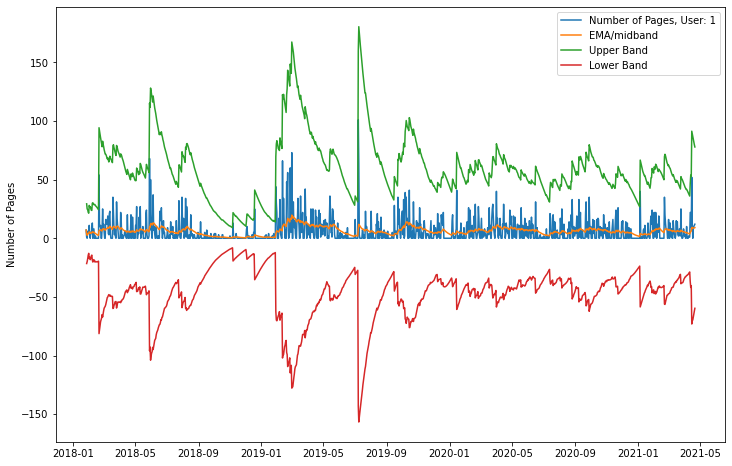

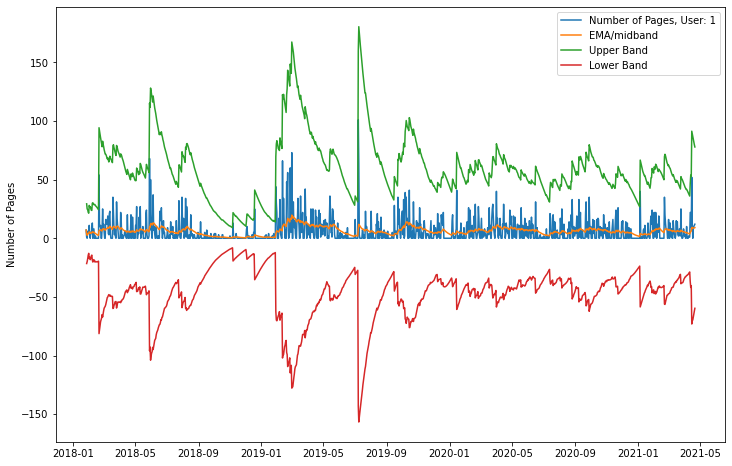

In [9]:
user = 1
span = 30
weight = 6
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [ ]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)